# Análise de Dados para Redução de Churn - Petlove&CO Case

# 1 Introdução

Este projeto tem como foco a análise de dados do serviço de assinaturas da Petlove&CO, com o objetivo principal de identificar fatores chave que contribuem para o churn de clientes (cancelamento de assinaturas). A análise visa proporcionar insights acionáveis que possam ser usados para desenvolver estratégias eficazes na retenção de clientes e redução do churn.

### 1.1- Objetivos Específicos

- **Explorar o Conjunto de Dados**: Realizar uma análise exploratória para entender as características dos clientes e identificar padrões e tendências.
- **Identificar Fatores de Churn**: Analisar os dados para encontrar correlações e padrões que possam indicar os motivos pelos quais os clientes decidem cancelar suas assinaturas.
- **Sugerir Estratégias de Retenção**: Com base nas análises realizadas, propor ações concretas que a Petlove&CO possa implementar para melhorar a retenção de clientes.

### 1.2- Ferramentas e Metodologia

- **Ferramentas Utilizadas**: Python e Jupyter Notebooks para análise de dados, com bibliotecas como Pandas, Plotly, Matplotlib e Seaborn para manipulação de dados e visualizações.
- **Abordagem de Análise**: A análise será conduzida através de uma combinação de estatísticas descritivas, visualizações de dados, e exploração de variáveis específicas que são potencialmente relevantes para o churn.

Com esses objetivos e ferramentas em mente, procederemos com a análise detalhada dos dados fornecidos.


### 1.3- Importação das Bibliotecas

Importação das bibliotecas necessárias.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde


# Definição de cores para os gráficos
solid_purple_color = "##5F097C" 
contrast_color = "#FFD700"
colors = ['#5F097C', '#6A0DAD', '#9932CC', '#6F42D6', '#7448AB', '#5F4A78']

### 1.4- Criação de dataframe com os dados de churn

Importação dos dados do arquivo csv para um dataframe do pandas.

In [27]:
data=pd.read_csv('data/data-test-analytics_5.csv')

### 1.4.1- Descrição das Colunas do Conjunto de Dados

Este conjunto de dados contém várias colunas que fornecem informações sobre os clientes e suas assinaturas. Abaixo está uma descrição breve de cada coluna:

- **id**: Identificação única do cliente.
- **created_at**: Data de criação da assinatura do cliente.
- **updated_at**: Data da última modificação feita na assinatura.
- **deleted_at**: Data em que a assinatura foi cancelada.
- **name_hash, email_hash, address_hash**: Nome, email e endereço do cliente, respectivamente, criptografados por motivos de privacidade.
- **birth_date**: Data de aniversário do cliente.
- **status**: Status atual da assinatura (ativo, pausado, etc.).
- **version**: Versão da assinatura.
- **city, state, neighborhood**: Localização do cliente, incluindo cidade, estado e bairro.
- **last_date_purchase**: Data do último pedido realizado através da assinatura.
- **average_ticket**: Média de gasto por pedido.
- **items_quantity**: Quantidade média de itens por assinatura.
- **all_revenue**: Receita total gerada pelo cliente.
- **all_orders**: Número total de pedidos feitos pelo cliente.
- **recency**: Número de dias desde a última compra do cliente.
- **marketing_source**: Canal de marketing que converteu a assinatura.


### 1.5- Verificação da quantidade de dados e atributos



In [28]:
data.shape

(10000, 20)

Podemos observer que o conjunto de dados possui 10.000 de linhas e 20 colunas, o que representa 10.000 informações de clientes e 20 atributos que descrevem cada cliente.

# 2- Análises Exploratórias

Agora teremos uma visão mais detalhada dos dados e suas características, com o objetivo de entender melhor o conjunto de dados e identificar padrões e tendências.

Para isso, vamos começar com uma análise exploratória dos dados, que inclui a verificação de valores ausentes, a distribuição de valores em cada coluna, e a identificação de outliers.

## 2.1- Análise Exploratória de Dados

Nesta seção, realizarei uma análise exploratória dos dados para entender melhor as características dos clientes e identificar padrões que podem estar associados ao churn.

### 2.1.2- Verificação dea Correlação entre as Variáveis

Verificando se há correlação entre as variáveis.

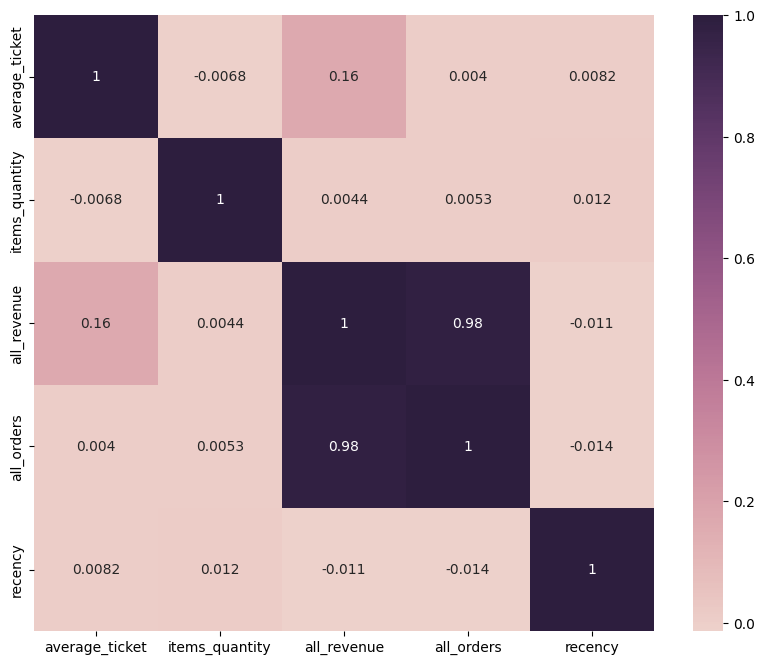

In [29]:
#Análise de correlação entre as variáveis
# Selecionando apenas colunas numéricas para calcular a correlação
data_numeric = data.select_dtypes(include=[np.number])

# Calculando a correlação entre as colunas numéricas
corr = data_numeric.corr()

# Exibindo o mapa de calor da correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

A tabela de correlação acima mostra algumas correlações entre tempo de subscrição e receita, número de pedidos e recência. Essas correlações são esperadas, pois clientes que assinam por mais tempo tendem a fazer mais pedidos e gastar mais dinheiro.

### 2.1.2- Verificação de Dados Faltantes

Verificando se há dados faltantes no conjunto de dados, o que é crucial para a integridade da análise.

In [30]:
missing_data = data.isnull().sum()
missing_data


id                       0
created_at               0
updated_at               0
deleted_at            9495
name_hash                0
email_hash               0
address_hash             0
birth_date               0
status                   0
version                  0
city                     0
state                    0
neighborhood             0
last_date_purchase       0
average_ticket           0
items_quantity           0
all_revenue              0
all_orders               0
recency                  0
marketing_source         0
dtype: int64

Observamos que há dados faltantes apenas no deleted_at, que representa a data de cancelamento da assinatura. Isso faz sentido, pois os clientes que não cancelaram suas assinaturas ainda não possuem uma data de cancelamento.

Pela contagem dos valores, podemos concluir que 9.495 clientes ainda possuem assinaturas, ativas ou pausadas, enquanto 505 clientes já cancelaram suas assinaturas.

### 2.1.3- Quantidade de cancelamentos de assinaturas
Outro ponto muito importante desta análise inicial é que podemos ter, uma estimativa local dado o tamanho da amostra, de que a taxa de churn baseada na quantidade de clientes que cancelaram suas assinaturas que são 505 dentre as 10.000 amostras, é de:

$ \frac{505}{10000} = 5,05\%$


### 2.1.4- Distribuição dos Status das Assinaturas

Agora vamos analisar a distribuição dos status das assinaturas, para entender melhor a situação atual dos clientes.

In [31]:
status_count = data['status'].value_counts()
status_count

status
active      8524
paused       971
canceled     505
Name: count, dtype: int64

In [32]:
# Dados para o gráfico de pizza
status = data['status'].unique()
counts = data['status'].value_counts()

# Criando o gráfico de pizza com o Plotly
fig = px.pie(names=status, values=counts, title='Distribuição de Status', color_discrete_sequence=colors)
fig.write_image("imgs/status.png")
fig.show()

Uma observação interessante sobre a contagem dos status é que de 10.000 clientes presentes no conjunto, 971 estão com a assinatura pausada, o que representa 9.71% do total e 505 estão com a assinatura cancelada, o que representa 5.05% do total. Totalizando 14.76% de clientes que não estão com a assinatura ativa.

Este indicativo representa que apesar do Churn (que atualmente está em 5.05%) ser um problema, a quantidade de assinaturas em pausa pode indicar um futuro aumento na quantidade de Churn. Pois ainda que não esteja diretamente relacionada ao cancelamento, esta alta quantia de assinaturas em pausa pode representar um sentimento de insatisfação dos clientes diante do serviço das assinaturas.

Logo podemos inferir que uma observação mais detalhada sobre os clientes que estão com a assinatura pausada, e seus motivos, pode ser uma boa estratégia para a redução do Churn.

## 2.2 Análise da Distribuição da Duração da Assinatura para Clientes Cancelados (Dados Temporais)

Análise dos dados temporais para verificação de tendências e padrões no tempo médio de duração de uma assinatura, com base nas datas de criação e cancelamento das assinaturas.

### 2.2.1- Conversão dos dados de data para o formato datetime

Conversão dos dados de data das colunas 'created_at' e 'deleted_at' para o formato datetime para facilitar a manipulação dos dados.

In [33]:
# Convertendo as colunas para datetime com formatação específica
data['created_at'] = pd.to_datetime(data['created_at'], format='%m/%d/%y %I:%M %p')
data['deleted_at'] = pd.to_datetime(data['deleted_at'], format='%m/%d/%y %I:%M %p', errors='coerce')  # 'coerce' para lidar com Not a number (NaN) quando não houver data de exclusão

In [34]:
# Calculando a duração da assinatura
data['subscription_duration'] = (data['deleted_at'] - data['created_at']).dt.days

# Filtrando para clientes que cancelaram suas assinaturas
cancelled_data = data.dropna(subset=['deleted_at'])

Criação do gráfico para visualização da distribuição da duração das assinaturas para os clientes que cancelaram suas assinaturas.

In [35]:

# 
fig = px.histogram(
    cancelled_data, 
    x='subscription_duration', 
    nbins=30, 
    marginal='rug',  # Altere para 'box', 'violin', ou 'rug' para diferentes tipos de marginais
    color_discrete_sequence=['#5F097C'],
    width=1000, height=500)


fig.update_layout(
    title='Distribuição da Duração da Assinatura para Clientes Cancelados',
    xaxis_title='Duração da Assinatura (Dias)',
    yaxis_title='Frequência',
    template='plotly_white'
)

fig.write_image('imgs/subscription_duration.png')
fig.show()



O histograma acima representa a distribuição da duração das assinaturas antes dos clientes procederem com o cancelamento. A forma da distribuição sugere várias interpretações-chave:

- **Concentração Inicial Alta**: Observa-se uma alta frequência de cancelamentos em períodos mais curtos de assinatura. Isso pode indicar um período de "teste" em que os clientes estão mais propensos a cancelar se não estiverem satisfeitos com o serviço ou um indicativo de que os clientes cancelem suas assinaturas após receberem o produto que desejavam.

- **Decaimento Gradual**: A frequência de cancelamentos diminui à medida que a duração da assinatura aumenta, sugerindo que os clientes que permanecem assinantes por períodos mais longos tendem a ser mais leais ou mais satisfeitos com o serviço.

- **Longevidade**: Existem algumas ocorrências de cancelamentos em durações de assinatura muito longas, indicando que pode haver outros fatores que influenciam a decisão de cancelamento após um longo período de tempo.

#### Implicações Estratégicas

- **Período de Risco**: A empresa pode se beneficiar ao focar esforços de retenção durante o período inicial de alto risco identificado no gráfico.

- **Pesquisa de Satisfação**: Realizar pesquisas de satisfação ou análises de feedback podem ser úteis para entender as razões dos cancelamentos iniciais.

- **Programas de Fidelidade**: Incentivar programas de fidelidade ou benefícios para clientes a longo prazo poderia potencialmente reduzir a taxa de churn ao longo do tempo.

### 2.2.2- Categorização da Duração das Assinaturas

Para entender melhor como o tempo de permanência está distribuído entre os clientes que cancelaram suas assinaturas, implementamos uma função de categorização. Esta função organiza a duração das assinaturas em grupos distintos baseados no número de dias até o cancelamento. Os grupos são definidos como:

- **1-3 dias**: Indica cancelamentos quase imediatos, sugerindo uma insatisfação inicial ou outros problemas imediatos com o serviço de assinatura.
- **15 dias**: Este grupo pode representar clientes que testaram o serviço por um curto período antes de decidir cancelar.
- **30 dias**: Representa clientes que ficaram com a assinatura por um mês, o que pode coincidir com o final de um ciclo de faturamento.
- **45 dias**: Clientes que ultrapassaram um ciclo de faturamento, mas não permaneceram por dois meses completos.
- **60 dias**: Este grupo pode indicar uma avaliação mais extensa do serviço antes do cancelamento.
- **90 dias**: Clientes que permaneceram por cerca de três meses, um marco significativo que pode ser associado a uma avaliação mais profunda ou a satisfação com o serviço.
- **120 dias**: Este grupo sugere uma permanência mais prolongada, potencialmente indicando uma dependência do serviço.
- **150 dias**: Representa clientes que podem ter experimentado o serviço por um período substancial, mas escolheram cancelar por razões que exigem investigação.
- **180 dias**: Estes são os clientes que ficaram por seis meses, um período considerável que sugere um comprometimento mais sério com o serviço.
- **1 ano**: Este grupo representa clientes que permaneceram por um ano inteiro, o que pode indicar uma satisfação significativa com o serviço.
- **2 anos**: Representa clientes que permaneceram por dois anos, o que pode indicar uma satisfação ainda maior com o serviço.
- **Mais de 180 dias**: Clientes com longa duração de assinatura, cujos cancelamentos podem fornecer insights valiosos sobre os desafios de retenção a longo prazo.

Utilizando essa função, podemos segmentar os dados de cancelamento e realizar análises mais profundas sobre padrões específicos de churn ao longo do tempo.

## 2.3- Análise da Duração da Assinatura Antes do Cancelamento


In [36]:
# Criando os grupos de duração da assinatura (em dias)
def categorize_duration(duration):
    if duration <= 3:
        return "1-3 dias"
    elif duration <= 15:
        return "15 dias"
    elif duration <= 30:
        return "30 dias"
    elif duration <= 45:
        return "45 dias"
    elif duration <= 60:
        return "60 dias"
    elif duration <= 90:
        return "90 dias"
    elif duration <= 120:
        return "120 dias"
    elif duration <= 150:
        return "150 dias"
    elif duration <= 180:
        return "180 dias"
    elif duration <= 360:
        return "1 ano"
    elif duration <= 720:
        return "2 anos"
    else:
        return "Mais de 2 anos"

Aplicação da função de categorização para criar uma nova coluna no dataframe com os grupos de duração das assinaturas.

In [37]:
# Suponha que esta é a função que você já tem e está aplicando ao seu DataFrame
data['duration_group'] = data['subscription_duration'].apply(categorize_duration)

# Filtrando apenas as linhas onde a assinatura foi cancelada
cancelled_data = data[data['deleted_at'].notnull()]

# Contagem de clientes em cada grupo de duração
duration_group_counts = cancelled_data['duration_group'].value_counts().sort_index()

# Convertendo as contagens para um DataFrame
df = pd.DataFrame(duration_group_counts).reset_index()
df.columns = ['duration_group', 'count']

# Aqui você pode definir uma ordem personalizada para os grupos de duração
ordered_groups = [
    "1-3 dias", "15 dias", "30 dias", "45 dias", "60 dias", 
    "90 dias", "120 dias", "150 dias", "180 dias", "1 ano", "2 anos", "Mais de 2 anos"
]

# Mapeando os grupos de duração para uma ordem numérica
group_order = {key: i for i, key in enumerate(ordered_groups)}

# Criando uma coluna 'order' com base na ordem personalizada
df['order'] = df['duration_group'].map(group_order)

# Ordenando o DataFrame pela coluna 'order'
df = df.sort_values('order').drop('order', axis=1)



Criação da tabela de frequência para visualização dos grupos de duração das assinaturas.

In [38]:
# Função para aplicar cor de fundo somente à coluna 'duration_group'
def highlight_duration_group(s):
    return ['background-color: #5F097C' if v else '' for v in s]

# Aplicando o estilo ao DataFrame
styled_table = df.style.apply(highlight_duration_group, subset=['duration_group']) \
    .set_properties(**{'color': 'white', 'border-color': 'black', 'border-width': '1px', 'border-style': 'solid', 'text-align': 'left'}) \
    .set_table_styles([{'selector': 'th, td', 'props': [('border', '1px solid black')]}, {'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white')]}]) \
    .hide()

styled_table


duration_group,count
1-3 dias,8
15 dias,18
30 dias,22
45 dias,10
60 dias,17
90 dias,23
120 dias,19
150 dias,22
180 dias,22
1 ano,110



A tabela apresenta a contagem de clientes que cancelaram suas assinaturas categorizados pela duração da assinatura. A partir dos dados, podemos observar o seguinte:

- **Curto Prazo (1-3 dias até 60 dias):** Há uma quantidade relativamente menor de cancelamentos, o que sugere que os clientes tendem a dar uma chance à assinatura antes de decidir cancelar.

- **Médio Prazo (90 dias até 180 dias):** A contagem de cancelamentos é consistentemente moderada, indicando que este pode ser um período crítico onde os clientes avaliam o valor de sua assinatura.

- **Longo Prazo (1 ano ou mais):** Observa-se um aumento significativo no número de cancelamentos para assinaturas com duração de um ano ou mais. Isso pode indicar que fatores como satisfação com o serviço ou mudanças nas necessidades dos clientes influenciam a decisão de continuar com a assinatura a longo prazo.



In [39]:
# Extraindo e agrupando por mês
data['created_month'] = data['created_at'].dt.month
data['deleted_month'] = data['deleted_at'].dt.month

creation_counts = data.groupby('created_month')['id'].count()
cancellation_counts = data[data['deleted_at'].notna()].groupby('deleted_month')['id'].count()

month_names = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
               7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}

# Convertendo índices em Series e aplicando o mapeamento
creation_months = pd.Series(creation_counts.index).map(month_names)
cancellation_months = pd.Series(cancellation_counts.index).map(month_names)

In [40]:
# Criando o gráfico de barras com Plotly
fig = go.Figure()

# Adicionando as criações
fig.add_trace(go.Bar(
    x=creation_months,
    y=creation_counts,
    name='Criações',
    marker_color='#5F097C'
))

# Adicionando os cancelamentos
fig.add_trace(go.Bar(
    x=cancellation_months,
    y=cancellation_counts,
    name='Cancelamentos',
    marker_color='red'
))

# Personalizando o gráfico
fig.update_layout(
    title='Criações e Cancelamentos de Assinaturas por Mês',
    xaxis=dict(title='Mês'),
    yaxis=dict(title='Número de Assinaturas'),
    barmode='group'
)
fig.write_image('imgs/subscription_creation_cancellation.png')
# Mostrando o gráfico
fig.show()

## 2.4- Análise Descritiva dos Dados

Realizando uma análise descritiva para obter uma visão geral estatística dos dados, incluindo medidas como média, mediana, desvio padrão, etc.


In [41]:
descriptive_stats = data.describe()
descriptive_stats

,created_at,deleted_at,average_ticket,items_quantity,all_revenue,all_orders,recency,subscription_duration,created_month,deleted_month
count,10000,505,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,505.000000,10000.000000,505.000000
mean,2018-08-12 05:40:22.464000,2019-12-02 14:16:21.861385984,216.894709,8.49980,1174.888603,5.415400,67.192900,471.700990,6.481400,6.661386
min,2016-02-19 10:00:00,2016-05-02 13:46:00,131.378672,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,2017-05-15 11:42:00,2019-04-04 11:10:00,201.398851,6.00000,494.873564,2.000000,31.000000,133.000000,3.000000,3.000000
50%,2018-08-09 21:42:00,2020-04-16 15:38:00,217.019478,8.00000,1172.751918,5.000000,35.000000,322.000000,6.000000,7.000000
75%,2019-11-04 17:18:30,2020-11-02 21:59:00,232.455042,11.00000,1798.475045,8.000000,39.000000,750.000000,9.000000,10.000000
max,2021-02-18 05:04:00,2021-02-17 22:19:00,303.386848,19.00000,3225.654163,11.000000,1820.000000,1771.000000,12.000000,12.000000
std,NaN,NaN,22.757213,3.02604,763.141973,3.457577,175.723276,423.662606,3.446773,3.747776


### 2.4.1- Análise Descritiva dos Dados em Boxplots 

Criação de boxplots para visualização da distribuição dos dados e identificação de outliers.

In [42]:
# Criando o boxplot com Plotly
fig = px.box(data, y='subscription_duration', color_discrete_sequence=["#5F097C"])

# Personalizando o gráfico
fig.update_layout(
    title='Distribuição da Duração da Assinatura',
    yaxis_title='Duração da Assinatura (Dias)',
    template='plotly_white',
     width=1300, height=500)

fig.write_image('imgs/subscription_duration_boxplot.png')
# Mostrando o gráfico
fig.show()


O boxplot acima revela algumas tendências interessantes:

- **Mediana:** A mediana da duração está abaixo dos 750 dias, indicando que a maioria dos clientes tende a cancelar suas assinaturas antes desse período.
- **Concentração da distribuição:** A maioria das durações de assinatura está concentrada em um intervalo mais baixo, como mostrado pela caixa compacta do boxplot, sugerindo que muitos clientes possuem hábitos de assinatura semelhantes em termos de duração.
- **Outliers:** Existem alguns outliers, representados por pontos acima do limite superior do boxplot, sugerindo que há clientes com durações de assinatura excepcionalmente longas, potencialmente indicando um núcleo de clientes altamente leais ou satisfeitos. Não há indícios de outliers abaixo do limite inferior, o que ocorre pois não há durações de assinatura negativas e alguns clientes cancelam no mesmo dia que contratam.

## 2.5- Análise da Distribuição do Valor Médio de Compra (Average Ticket)

Analisando variáveis específicas que podem ser cruciais para entender o comportamento do cliente, como 'status', 'last_date_purchase', 'average_ticket', etc.


In [43]:
# Criando o histograma com Plotly
fig = px.histogram(
    data, 
    x='average_ticket', 
    nbins=30, 
    marginal='rug',  # Opção para adicionar uma representação "rug" na margem
    color_discrete_sequence=["#5F097C"],  # Utilizando cor roxa
     width=1300, height=500)

# Personalizando o gráfico
fig.update_layout(
    title='Distribuição do Valor Médio de Compra (Average Ticket)',
    xaxis_title='Valor Médio de Compra (R$)',
    yaxis_title='Frequência (Clientes)',
    template='plotly_white'
)

fig.write_image('imgs/average_ticket.png')
# Mostrando o gráfico
fig.show()

O histograma apresentado demonstra a distribuição do valor médio de compra (conhecido como Average Ticket) dos clientes. Acompanhado de uma curva de densidade, o gráfico revela várias características importantes sobre o comportamento de compra:

- **Distribuição Aproximadamente Normal**: A forma da distribuição sugere que a maioria dos clientes gasta uma quantia média em torno de um valor central, com menos clientes gastando muito pouco ou muito.

- **Pico Central**: O pico da curva de densidade em torno do valor médio indica que a maior parte dos clientes tem um valor de compra concentrado nesta região, o que pode ser considerado o 'ticket padrão' para a base de clientes.

- **Caudas**: As caudas da distribuição nos extremos inferiores e superiores indicam que há menos clientes que gastam significativamente menos ou mais do que a média, o que é típico em muitos modelos de negócios.

### Implicações para o Negócio

- **Estratégias de Marketing**: Compreender a distribuição do valor médio de compra pode ajudar a refinar as estratégias de marketing e precificação. Ofertas e promoções podem ser direcionadas para incentivar clientes que gastam menos a aumentar seu valor de compra.

- **Segmentação de Clientes**: O gráfico pode sugerir a existência de diferentes segmentos de clientes, como aqueles que consistentemente gastam mais e podem ser alvo de programas de fidelidade ou ofertas premium.

- **Oportunidades de Upsell**: Os clientes que estão nas caudas inferiores da distribuição representam oportunidades de upsell, onde estratégias de venda cruzada e upselling podem ser aplicadas para aumentar o valor médio de compra.



## 2.6- Análise da Distribuição da Recência

A recência dos clientes é uma métrica importante que indica o número de dias desde a última compra. Uma menor recência geralmente sugere um engajamento mais recente e contínuo do cliente com a empresa. Analisar a distribuição da recência pode nos ajudar a entender melhor a frequência com que os clientes estão fazendo compras e identificar padrões relacionados ao churn.



### 2.6.1- Análise da Distribuição da Recência (dias desde a última compra) - até 200 dias

#### Histograma da Recência

O histograma abaixo mostra a distribuição dos dias de recência para compras, limitado a um período de até 200 dias. Essa limitação foi aplicada para focar nos padrões mais recentes e relevantes de comportamento de compra, que são mais críticos para análises de churn a curto prazo. E afim de melhorar a visualização do gráfico, já que o intervalo possuia uma variação muito grande de frenquência, que prejudicava a percepcção da distribuição dos dados.


In [44]:
# Filtrando os dados para recência menor que 200 dias.

filtered_data = data[data['recency'] < 200]

# Criando o histograma com Plotly
fig = px.histogram(
    filtered_data, 
    x='recency', 
    nbins=30, 
    marginal='rug',  # Adiciona uma representação 'rug' na margem
    color_discrete_sequence=["#5F097C"],  # Utilizando cor roxa
     width=1300, height=500)


fig.update_layout(
    title='Distribuição da Recência (dias desde a última compra) - até 200 dias',
    xaxis_title='Recência (Dias)',
    yaxis_title='Frequência',
    template='plotly_white'
)
fig.write_image('imgs/recency.png')
fig.show()


Este histograma expande a análise da recência das compras dos clientes para um período de até 200 dias. A presença de uma curva de densidade fornece uma visualização suave da distribuição dos dados. As observações chave incluem:

- **Pico Acentuado de Recência Baixa**: O gráfico mostra um pico muito pronunciado nos primeiros 25 dias. Esta tendência indica que um número substancial de clientes fez compras recentemente, o que pode refletir positivamente na eficácia das estratégias de engajamento atuais.

- **Declínio Acentuado Após o Pico Inicial**: Após o pico inicial, a frequência de clientes com recência mais alta cai drasticamente, sugerindo que um intervalo maior entre as compras é menos comum.

- **Estabilidade Após Declínio**: Depois da queda inicial, a distribuição se estabiliza, mostrando um número menor, mas consistente, de clientes com recência de compra estendida.

### Implicações para o Negócio

- **Foco em Recência Baixa**: O pico inicial ressalta a importância de compreender o comportamento de compra dos clientes logo após a realização de uma compra. Estratégias para incentivar compras repetidas nesse intervalo podem ser valiosas.

- **Atenção a Clientes com Maior Recência**: Aqueles que estão na faixa de recência mais alta podem exigir estratégias de reengajamento, pois podem estar à beira do churn.

- **Investigação de Compras Repetidas**: Pode ser útil investigar as razões pelas quais alguns clientes continuam comprando regularmente ao longo de um período estendido, enquanto outros não.


### 2.6.2- Análise da Distribuição da Recência (dias desde a última compra) - até 60 dias
#### Histograma da Recência

O histograma abaixo mostra a distribuição dos dias de recência para compras, limitado a um período de até 60 dias. Essa limitação foi aplicada para focar ainda mais nos padrões mais recentes e relevantes de comportamento de compra, que são mais críticos para análises de churn a curto prazo. E afim de melhorar a visualização do gráfico, já que o intervalo possuia a maior concentração dentro deste período.


In [45]:
# Filtrando os dados para recência menor que 60 dias.

filtered_data = data[data['recency'] < 60]

# Criando o histograma com Plotly
fig = px.histogram(
    filtered_data, 
    x='recency', 
    nbins=30, 
    marginal='rug',  # Adiciona uma representação 'rug' na margem
    color_discrete_sequence=["#5F097C"],  # Utilizando cor roxa
     width=1300, height=500)
fig.update_layout(
    title='Distribuição da Recência (dias desde a última compra) - até 60 dias',
    xaxis_title='Recência (Dias)',
    yaxis_title='Frequência',
    template='plotly_white'
)
fig.write_image('imgs/recency_60.png')
fig.show()



O histograma acima ilustra a distribuição da recência das compras dos clientes, que é o número de dias desde a última compra, limitado a um período de até 60 dias. A curva de densidade sobreposta oferece uma visão suavizada da distribuição. A partir deste gráfico, podemos extrair várias conclusões importantes:

- **Alta Frequência de Compras Recentes**: Há uma concentração significativa de compras recentes, com um pico visível nos primeiros 10 dias. Isso sugere que uma grande parcela dos clientes realizou compras num passado muito recente, indicativo de um bom engajamento com a loja no curto prazo.

- **Decréscimo Progressivo**: À medida que nos afastamos do ponto de pico, observamos um declínio na frequência, que se estabiliza após aproximadamente 30 dias. Isso pode indicar que a probabilidade de compra diminui à medida que o tempo desde a última compra aumenta.

- **Poucas Compras com Recência Alta**: Nota-se também que poucos clientes têm uma recência de compra que se aproxima de 60 dias, o que pode ser uma indicação de risco de churn ou uma tendência de compras menos frequentes.

### Implicações Estratégicas

- **Engajamento de Clientes**: Estratégias de marketing e engajamento devem ser mais agressivas à medida que a recência da última compra aumenta, especialmente após o pico inicial.

- **Incentivos para Repetição de Compra**: Incentivos como cupons de desconto ou promoções podem ser direcionados a clientes que estão no ponto médio da distribuição para estimular uma nova compra.

- **Risco de Churn**: Clientes com recência próxima de 60 dias podem ser considerados em risco de churn e podem necessitar de ações específicas de retenção.


## 2.7- Análise de impacto das Fontes de Marketing

A seguir o impacto das diferentes fontes de marketing na aquisição e retenção de clientes. Essa análise pode ajudar a identificar quais canais de marketing são mais eficazes na aquisição de clientes e quais são mais rentáveis para a empresa. 


In [46]:
# Agrupando os dados por fonte de marketing
marketing_source_stats = data.groupby('marketing_source').agg({
    'id': 'nunique',
    'all_revenue': 'sum'
})

# Renomeando as colunas para maior clareza
marketing_source_stats.rename(columns={'id': 'Total Customers', 'all_revenue': 'Total Revenue'}, inplace=True)

marketing_source_stats = data.groupby('marketing_source', as_index=False).agg({
    'id': 'nunique',
    'all_revenue': 'sum'
}).rename(columns={'id': 'Total Customers', 'all_revenue': 'Total Revenue'})



### 2.7.1- Análise da Distribuição das Fontes de Marketing

O gráfico de barras abaixo mostra a distribuição das fontes de marketing que convertem assinaturas.

In [47]:


# Criando o gráfico de pizza com Plotly
fig = px.pie(marketing_source_stats, values='Total Customers', names='marketing_source',
             title='Total de Clientes por Fonte de Marketing', color_discrete_sequence=colors)

# Removendo o label padrão do eixo y e adicionando as porcentagens em cada fatia
fig.update_traces(textinfo='percent+label')

fig.write_image('imgs/marketing_source.png')
# Mostrando o gráfico
fig.show()

O gráfico acima mostra a distribuição das fontes de marketing que convertem assinaturas. A partir dos dados, podemos observar o seguinte:
- Marketing orgânico e direto são as fontes mais comuns, representando mais de 50% das conversões.
- O marketing de busca paga é a terceira fonte mais comum, com cerca de 15,3% das conversões.

In [48]:
# Criando o gráfico de pizza para a receita total por fonte de marketing
fig = px.pie(
    marketing_source_stats, 
    values='Total Revenue', 
    names='marketing_source',  
    title='Receita Total por Fonte de Marketing', 
    color_discrete_sequence=colors
)

# Removendo o label padrão do eixo y e adicionando as porcentagens em cada fatia
fig.update_traces(textinfo='percent+label')
fig.update_layout(legend_title_text='Fonte de Marketing')

fig.write_image('imgs/marketing_source_revenue.png')
# Mostrando o gráfico
fig.show()

O gráfico acima mostra a distribuição da receita obtida pelas fontes de marketing que convertem assinaturas. A partir dos dados, podemos observar o seguinte:
- As distribuições de receita e conversão são semelhantes, com marketing orgânico e direto representando a maior parte da receita, e as outras fontes seguindo a mesma distribuição da conversão.

In [49]:
#Calculo da taxa de conversão por fonte de marketing 
conversion_label='Conversion Rate'
marketing_source_stats[conversion_label] = marketing_source_stats['Total Customers'] / marketing_source_stats['Total Customers'].sum()

# Convertendo a coluna 'Conversion Rate' para porcentagem e formatando com duas casas decimais.
marketing_source_stats[conversion_label] = marketing_source_stats[conversion_label].apply(lambda x: "{:.2%}".format(x))

# Definindo a função de estilo
def highlight_first_column_and_header(row):
    if row.name == 'marketing_source':
        return ['background-color: #7D26CD; color: white'] * len(row)
    else:
        return ['background-color: #7D26CD; color: white'] + [''] * (len(row) - 1)

# Aplicando o estilo ao DataFrame
styled_df = marketing_source_stats.style.apply(highlight_first_column_and_header, axis=1) \
                                       .set_table_styles([{
                                           'selector': 'th',
                                           'props': [('background-color', '#7D26CD'), ('color', 'white')]
                                       }])
styled_df

,marketing_source,Total Customers,Total Revenue,Conversion Rate
0,crm,1029,1242899.490393,10.29%
1,direct,2149,2542238.305027,21.49%
2,none,529,620122.048781,5.29%
3,organic_search,3699,4288452.536765,36.99%
4,paid_search,1526,1795513.213874,15.26%
5,telegram_whatsapp,1068,1259660.436896,10.68%


 A partir dos dados acima, podemos observar o seguinte:
 - Os canais de marketing direto e orgânico são os mais eficazes na conversão de assinaturas, representando 21.49% e 36.99% respectivamente, sendo estes também os que mais geram receita para a empresa.

# 3- Conclusões e próximos passos


## 3.1- Conclusões e Aprendizados

De acordo com a análise realizada, mesmo com uma baixa taxa de Churn, é importante monitorar a frequência de pausas nas assinaturas, pois elas podem indicar uma insatisfação com o serviço e resultar em possíveis cancelamentos futuros.
Por outro lado, há indicadores positivos de satisfação com o serviço, como a longa duração das assinaturas e a grande quantidade de assinaturas ativas.

**Pontos importantes de aprendizado:**
- Importância de alguns meios de marketing para a captação de assinantes;
- Tempo médio de recorrência em compras (recência), como ótimo indicativo de recorrência natural em pedidos;
- Importância da consulta dos motivos de cancelamento como forma direta para descoberta de problemas.



## 3.2- Próximos Passos

Com base nas análises realizadas, podemos sugerir as seguintes ações para a Petlove&CO:

- Análise mais detalhada dos motivos de cancelamento e pausa das assinaturas;

- Análise de possíveis promoções do serviço para as fontes de Marketing com maior conversão e para clientes com assinatura a muito tempo, afim de preservar a fidelidade deste grupo de clientes;

- Análise dos tempos de recorrência utilizados pelos clientes em suas assinaturas, pois ainda que possamos deduzir pela distribuição da recência, uma confirmação neste ponto pode auxiliar na captação de clientes com períodos de recorrência pouco comuns.